In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df = df.drop('stab', 1)

In [4]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('stabf', 1)
y = df[['stabf']]

#Split into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.671365,0.380367,0.932340,0.821112,0.577835,0.068198,0.272932,0.954195,0.238500,0.837447,0.065691,0.813278
1,0.558188,0.607557,0.445405,0.349467,0.466385,0.193555,0.621676,0.798284,0.028968,0.385755,0.908498,0.854065
2,0.188048,0.408938,0.245239,0.504652,0.339393,0.531448,0.732018,0.712638,0.920287,0.084360,0.688470,0.014509
3,0.475764,0.179892,0.606958,0.008257,0.639912,0.026362,0.616975,0.474772,0.523093,0.016780,0.397283,0.804946
4,0.752247,0.914666,0.524646,0.993199,0.479150,0.496922,0.443090,0.637113,0.538482,0.075332,0.776320,0.263485


In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 1)

In [10]:
clf.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [11]:
y_preds = clf.predict(X_test)

In [12]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [13]:
cnf_mat_dec = confusion_matrix(y_test, y_preds, labels=['unstable', 'stable'])
print(cnf_mat_dec)

[[1154  134]
 [  85  627]]


In [14]:
def my_metrics(y_test, y_preds, decimal_places = 2, pos_label = 1):
    '''
    This function simply prints out the following metrics:
    1. The accuracy score
    2. The Precision
    3. The Recall
    4. The F1 score.
    NOTE: These metrics must be manually imported from scikit learn before running this function
    
    It takes 4 arguments in total,
    y_test: This contains the values for the True y label
    y_preds: This contains values for the predicted y label
    decimal_places: By default, this is 2, but can be changed. It determines how many decimal places the metric is printed out as
    pos_label: By default is 1, this determines the positive label in the first two parameters
    '''
    
    accuracy = accuracy_score(y_test,y_preds)
    print( 'Accuracy: {}' .format(round(accuracy, int(decimal_places))))
    
    precision = precision_score(y_test, y_preds, pos_label= pos_label )
    print( 'Precision: {}' .format(round(precision,  int(decimal_places))))
    
    recall = recall_score(y_test, y_preds, pos_label= pos_label )
    print( 'Recall: {}' .format(round(recall, int(decimal_places))))
    
    f1 = f1_score(y_test, y_preds, pos_label= pos_label )
    print( 'F1: {}' .format(round(f1, int(decimal_places))))

## Metrics for Random_forest classifier

In [15]:
my_metrics(y_test, y_preds, pos_label = 'stable', decimal_places = 4)

Accuracy: 0.8905
Precision: 0.8239
Recall: 0.8806
F1: 0.8513


In [16]:
from sklearn.ensemble import ExtraTreesClassifier

Ext_clf = ExtraTreesClassifier(random_state = 1)

In [18]:
Ext_clf.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [19]:
y_preds = Ext_clf.predict(X_test)
my_metrics(y_test, y_preds, pos_label = 'stable')

Accuracy: 0.89
Precision: 0.84
Recall: 0.86
F1: 0.85


## Hyper parameter tuning for extra tree classsifier using randomised search cv

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
# The fllowing are the hyper-parameters and the various values for it to search for
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 

# the parameters and the values is stored as a dictionary
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [22]:

%%time #This is simply a magic function to check the time it takes to run, 

rcv = RandomizedSearchCV(Ext_clf, 
                         param_distributions=hyperparameter_grid,
                         cv = 5,
                         n_iter=10, 
                         scoring = 'accuracy', 
                         n_jobs = -1, verbose = 1, 
                         random_state = 1)

# Finally fit on the trainig set
rcv.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 1min 20s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=10, n_jobs=None,
                                                  oob_score=False,
          

In [23]:
y_preds = rcv.predict(X_test)

In [24]:
my_metrics(y_test, y_preds, pos_label = 'stable')

Accuracy: 0.93
Precision: 0.92
Recall: 0.87
F1: 0.89


In [25]:
#This attribute prints out the best parameters
rcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

## I train another exra tree clssifier using the best parameters

In [26]:
new_ext_tree_clf = ExtraTreesClassifier(n_estimators = 1000,
                                        min_samples_split = 2,
                                        min_samples_leaf= 8,
                                        max_features= None, random_state = 1)

In [27]:
new_ext_tree_clf.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features=None, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=8, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [29]:
# The code below gets the different feature importances, since it is an ndarray, it is converted to a list
data = new_ext_tree_clf.feature_importances_.tolist()

# The code below converts the list to a series
data = pd.Series(data)

#The code below gets the name of the columns and converts it to series
cols = pd.Series(X_train.columns)

# This codes finally converts it to a dataframe
feat_imp = pd.DataFrame({'columns': cols, 'Data': data})
feat_imp.head(2)

,columns,Data
0,tau1,0.137240
1,tau2,0.140508


In [32]:
#prints ot the maximum and minimum feature importants as a dataframe
feat_imp[(feat_imp['Data'] == feat_imp['Data'].min()) | (feat_imp['Data'] == feat_imp['Data'].max())]

,columns,Data
1,tau2,0.140508
4,p1,0.003684


## Lets visualize the features and their importance

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
feature_importance_normalized =new_ext_tree_clf.feature_importances_.tolist()

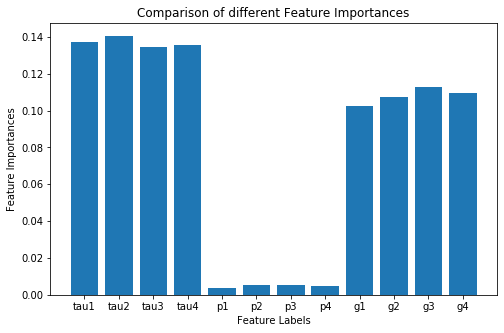

In [34]:
plt.figure(figsize=(8,5))
plt.bar('columns', 'Data', data =feat_imp) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

### X_Gboost and Lightgbm

In [35]:
from xgboost import XGBClassifier

In [36]:
xgb_clf = XGBClassifier(random_state = 1)

In [37]:
xgb_clf.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
y_preds = xgb_clf.predict(X_test)
my_metrics(y_test, y_preds, pos_label = 'stable', decimal_places = 4)

Accuracy: 0.9195
Precision: 0.9206
Recall: 0.8469
F1: 0.8822


In [39]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier(random_state = 1)

In [40]:
lgb_clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [41]:
y_preds = lgb_clf.predict(X_test)
my_metrics(y_test, y_preds, pos_label = 'stable', decimal_places = 4)

Accuracy: 0.9415
Precision: 0.933
Recall: 0.9003
F1: 0.9164
